<a href="https://colab.research.google.com/github/prateekk21/icc-data-analysis/blob/main/Prateek_Arora_M1W4_Self_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b> The International Cricket Council (ICC) is the world governing body of cricket. It was founded as the Imperial Cricket Conference in 1909 by representatives from Australia, England and South Africa. It was renamed as the International Cricket Conference in 1965, and took up its current name in 1989. It organises world championship events such as Cricket World Cup, Women's Cricket World Cup, ICC T20 World Cup, ICC Women's T20 World Cup, ICC Champions Trophy and Under-19 Cricket World Cup.</b>

<br>

## <b> You recently got a lucky break in the field of Data Science. You got a job of Data Scientist at ICC. You are part of the Analytics Team which is involved in pre-match analyses, live-match analyses and post-match analyses. </b>

<br>

## <b>This data consists of 1417 T20 matches. Each row corresponds to a single T20 match. As a data scientist, you have to first explore the data and check its sanity. </b>

<br>

## <u><b>Further you are required to do some analyses :</b></u>
* ### Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date
* ### Find out the top three venues which hosted the greatest number of matches.
* ### Find out the pair of cricket teams who played the most number of T20 matches against each other.
* ### Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100.
* ### Write a function to get the scorecard of each match. This function would take the innings value as argument and return two scorecard dataframes each for one team as shown below. So the first dataframe would contain the top 4 scorers of the team who batted first and the top 4 bowlers of the opponent team. And the second dataframe would contain the top 4 scorers of the team who batted second and the top 4 bowlers of the opponent team.




# <b><center> A sample scorecard </center></b>

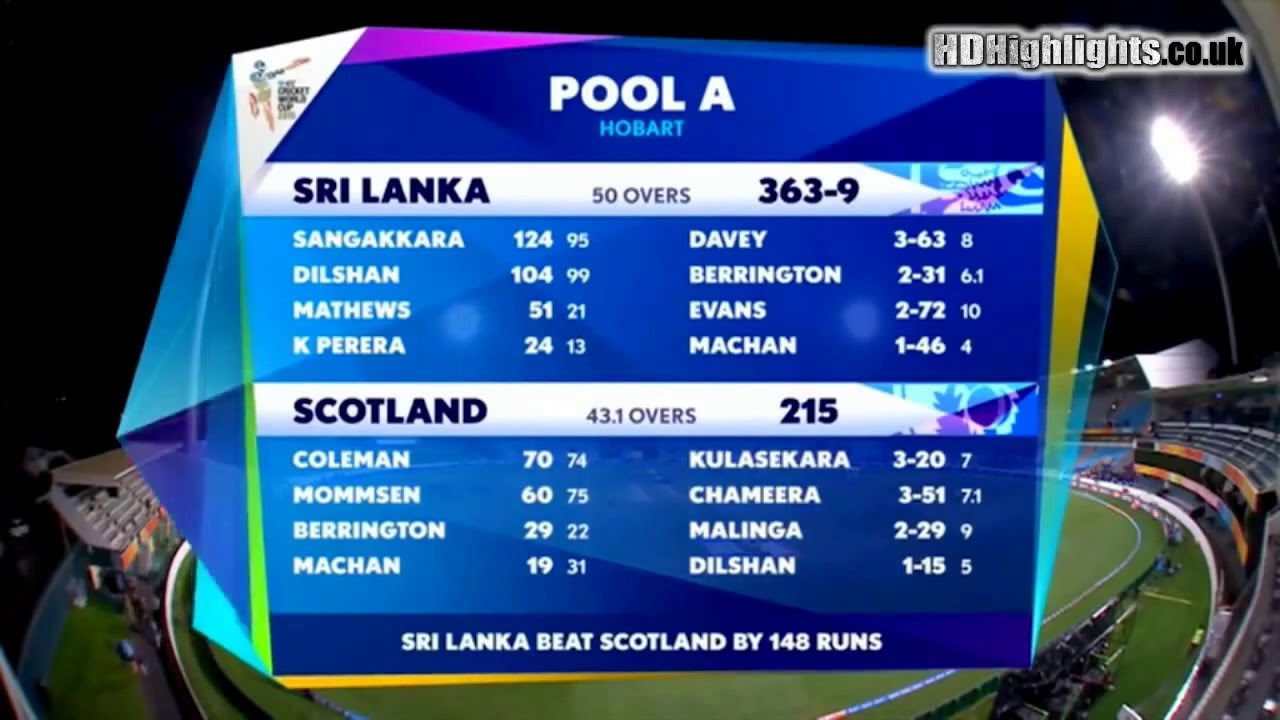

#Firstly we will import all the packages required and mount the drive

In [ ]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import the dataset

In [ ]:
working_directory = '/content/drive/MyDrive/AlmaBetter/Month 1/data/International_T20_Data.csv'
df = pd.read_csv(working_directory)

## Print the dataset head

In [ ]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['innings'][0]

"[{'1st innings': {'team': 'Australia', 'deliveries': [{0.1: {'batsman': 'AJ Finch', 'bowler': 'SL Malinga', 'non_striker': 'M Klinger', 'runs': {'batsman': 0, 'extras': 0, 'total': 0}}}, {0.2: {'batsman': 'AJ Finch', 'bowler': 'SL Malinga', 'non_striker': 'M Klinger', 'runs': {'batsman': 0, 'extras': 0, 'total': 0}}}, {0.3: {'batsman': 'AJ Finch', 'bowler': 'SL Malinga', 'non_striker': 'M Klinger', 'runs': {'batsman': 1, 'extras': 0, 'total': 1}}}, {0.4: {'batsman': 'M Klinger', 'bowler': 'SL Malinga', 'non_striker': 'AJ Finch', 'runs': {'batsman': 2, 'extras': 0, 'total': 2}}}, {0.5: {'batsman': 'M Klinger', 'bowler': 'SL Malinga', 'non_striker': 'AJ Finch', 'runs': {'batsman': 0, 'extras': 0, 'total': 0}}}, {0.6: {'batsman': 'M Klinger', 'bowler': 'SL Malinga', 'non_striker': 'AJ Finch', 'runs': {'batsman': 3, 'extras': 0, 'total': 3}}}, {1.1: {'batsman': 'M Klinger', 'bowler': 'KMDN Kulasekara', 'non_striker': 'AJ Finch', 'runs': {'batsman': 0, 'extras': 0, 'total': 0}}}, {1.2: {'b

In [ ]:
type(df['innings'][0])

str

## Here, as we can see the innings values are in string. So we need to convert it to more interactive form so that we can easily fetch the required details of innings

### We will use literal.eval to convert str to list.

In [ ]:
df['innings'] = df['innings'].apply(lambda x : eval(x))

In [ ]:
type(df['innings'][0])

list

### Now, it is converted to list, now we can easily fetch any details we need.

# We will fetch the 1st index of the innings series and plot a graph of the two teams.

In [ ]:
# Let's check each and every element to make it easy to evaluate.

df['innings'][0][0]['1st innings']['team']

'Australia'

In [ ]:
df['innings'][0][0]['1st innings']['deliveries'][0].keys()

dict_keys([0.1])

In [ ]:
df['innings'][0][0]['1st innings']['deliveries'][0]

{0.1: {'batsman': 'AJ Finch',
  'bowler': 'SL Malinga',
  'non_striker': 'M Klinger',
  'runs': {'batsman': 0, 'extras': 0, 'total': 0}}}

## Now we will make a function which would take deliveries as arguments and return a dataframe containing - Over Details, Total Runs and Wickets

In [ ]:
# Let's segregate the inputs for both innings

first_innings_deliveries = df['innings'][0][0]['1st innings']['deliveries']
second_innings_deliveries = df['innings'][0][1]['2nd innings']['deliveries']

In [ ]:
def get_innings_score(innings):

  # We are creating an empty dataframe.
  sports_df_1 = pd.DataFrame(columns = ['over', 'extras', 'runs', 'wicket'])
  for i in innings:
    
    for j in i:
      dic = list(i.keys())
      w=0
      if 'wicket' in i[j].keys():
        w=+1

      sports_df_1 = sports_df_1.append({'over': dic[0], 'extras': i[j]['runs']['extras'], 'runs':i[j]['runs']['total'], 'wicket' : w }, ignore_index=True)
  
  sports_df_1['over no'] = sports_df_1['over'].apply(lambda x : int(x))
  sports_df_1['over no'] = sports_df_1['over no']+1

  # sports_df.groupby('over no').agg({'runs': sum, 'wicket': sum}).reset_index()
  df_2 = sports_df_1.groupby('over no').agg({'runs': sum, 'wicket': sum}).reset_index()
  df_2['total runs'] = df_2['runs'].cumsum()
  df_2['total wickets'] = df_2['wicket'].cumsum()

      # df_3 = sports_df_1.groupby('over no')['wicket'].sum().reset_index()
      # df_3['total wickets'] = df_3['wicket'].cumsum()

      # df_4 = pd.concat([df_2, df_3], axis = 1)
  
  return df_2

## Let's set the values of both dataframes in some values.

In [ ]:
team_name_1st = df['innings'][0][0]['1st innings']['team']
team_name_2nd = df['innings'][0][1]['2nd innings']['team']

###Graph plotted

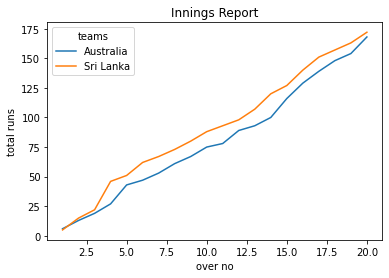

In [ ]:
sns.lineplot(data = first_df, x='over no', y='total runs', label = team_name_1st)
sns.lineplot(data = second_df, x='over no', y='total runs', label = team_name_2nd)
# sns.lineplot(data = first_df, x = 'over no', y='total wickets', label = 'wickets')
plt.title("Innings Report")
plt.legend(title="teams")

#Rename all the column names to their appropriate names, for example meta.created should be renamed as created_date

In [ ]:
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,info.player_of_match,info.teams,info.toss.decision,info.toss.winner,info.umpires,info.venue,info.city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.rename(columns={'meta.created': 'created_date', 'meta.revision': 'revision', 'info.match_type': 'match_type', 'info.outcome.by.wickets': 'won_by_wickets', 'info.outcome.winner': 'winning team', 'info.player_of_match': 'player of the match', 'info.teams': 'team names', 'info.toss.decision': 'toss decision', 'info.toss.winner': 'toss_winner', 'info.umpires': 'umpires', 'info.venue': 'venue name', 'info.city': 'city'}, inplace = True)

In [ ]:
df.head()

,innings,meta.data_version,created_date,revision,info.dates,info.gender,match_type,won_by_wickets,winning team,info.overs,player of the match,team names,toss decision,toss_winner,umpires,venue name,city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Find out the top three venues which hosted the greatest number of matches.

In [ ]:
l = df['venue name'].tolist()

##Here, we will use counter method which is in collections library

In [ ]:
from collections import Counter

In [ ]:
d = dict(Counter(l))

In [ ]:
venue_df = pd.DataFrame.from_dict(d, orient='index').reset_index()

In [ ]:
venue_df.rename(columns = {'index': 'Venue_name', 0:'Frequency'}, inplace=True)

In [ ]:
v = venue_df.sort_values(by='Frequency', ascending = False).reset_index()

In [ ]:
del v['index']

In [ ]:
venue_df_1 = v.head()

In [ ]:
venue_df_1

,Venue_name,Frequency
0,Dubai International Cricket Stadium,62
1,Sheikh Zayed Stadium,41
2,Shere Bangla National Stadium,39
3,R Premadasa Stadium,35
4,Kinrara Academy Oval,32


## This graph clearly shows which are the top three stadiums for greatest number of matches

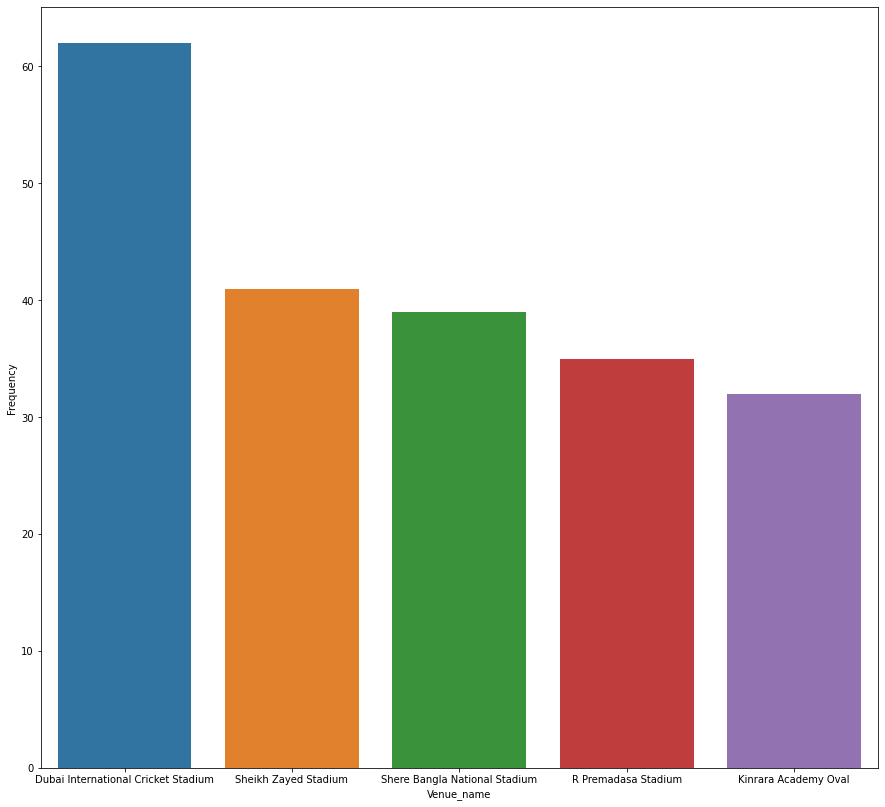

In [ ]:
# Top 3 venues which hosted greatest number of matches are
fig_dims = (15, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=venue_df_1, x='Venue_name', y='Frequency', ax=ax)

#Find out the pair of cricket teams who played the most number of T20 matches against each other.

In [ ]:
l_1 = df['team names'].tolist()

In [ ]:
d_1 = dict(Counter(l_1))

In [ ]:
team_df = pd.DataFrame.from_dict(d_1, orient='index').reset_index()

In [ ]:
team_df.head()

,Teams Name,Frequency
0,"['Australia', 'Sri Lanka']",17
1,"['Ireland', 'Hong Kong']",2
2,"['Zimbabwe', 'India']",7
3,"['New Zealand', 'Bangladesh']",4
4,"['New Zealand', 'South Africa']",15


In [ ]:
team_df.rename(columns = {'index': 'Teams Name', 0:'Frequency'}, inplace=True)

In [ ]:
t_df = team_df.sort_values(by='Frequency', ascending = False).reset_index()

In [ ]:
t_df

,Teams Name,Frequency
0,"['England', 'Pakistan']",29
1,"['Australia', 'Pakistan']",26
2,"['England', 'Australia']",25
3,"['Australia', 'India']",24
4,"['England', 'West Indies']",23
...,...,...
394,"['Italy', 'Jersey']",1
395,"['Denmark', 'Germany']",1
396,"['Malaysia', 'Maldives']",1
397,"['Rwanda', 'Uganda']",1


In [ ]:
del t_df['index']

In [ ]:
t_df_1 = t_df.head()

In [ ]:
t_df_1

,Teams Name,Frequency
0,"['England', 'Pakistan']",29
1,"['Australia', 'Pakistan']",26
2,"['England', 'Australia']",25
3,"['Australia', 'India']",24
4,"['England', 'West Indies']",23


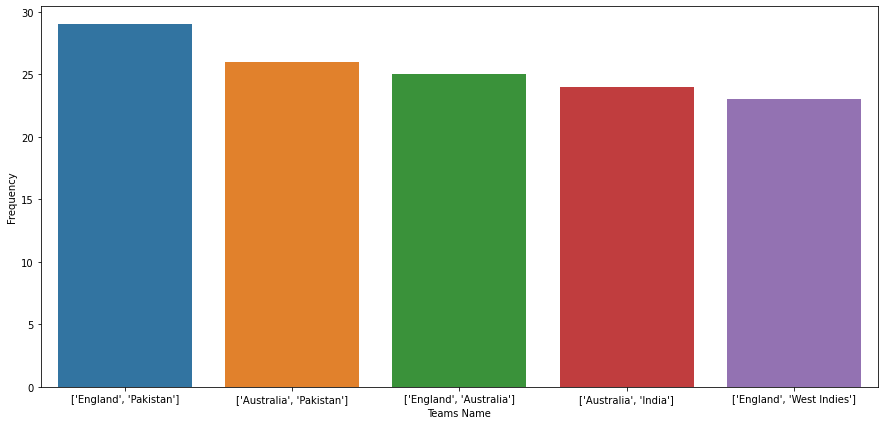

In [ ]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=t_df_1, x='Teams Name', y='Frequency', ax=ax)

# Print the top five teams by their win percentages. Win percentage is defined as the number of matches won divided by the number of matches played and then multiplied by 100

In [ ]:
df.head()

,innings,meta.data_version,created_date,revision,info.dates,info.gender,match_type,won_by_wickets,winning team,info.overs,player of the match,team names,toss decision,toss_winner,umpires,venue name,city,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Melbourne Cricket Ground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,['DAS Gunaratne'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['SD Fry', 'SJ Nogajski']","Simonds Stadium, South Geelong",Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,['A Zampa'],"['Australia', 'Sri Lanka']",field,Sri Lanka,"['MD Martell', 'P Wilson']",Adelaide Oval,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,NaN,"['Ireland', 'Hong Kong']",bat,Hong Kong,"['R Black', 'AJ Neill']","Bready Cricket Club, Magheramason",Londonderry,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,['E Chigumbura'],"['Zimbabwe', 'India']",field,India,"['TJ Matibiri', 'RB Tiffin']",Harare Sports Club,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
l2 = df['winning team'].tolist()
d2 = dict(Counter(l2))
w_df = pd.DataFrame.from_dict(d2, orient='index').reset_index()
w_df.head()
w_df.rename(columns={'index': 'country', 0:'win number'}, inplace = True)

In [ ]:
df['team names'] = df['team names'].apply(lambda x: eval(x))

In [ ]:
l3 = []
for i in df['team names']:
  for j in i:
    l3.append(j)
d3 = dict(Counter(l3))
df_t = pd.DataFrame.from_dict(d3, orient='index').reset_index()
df_t.head()
df_t.rename(columns={'index': 'country', 0:'play count'}, inplace=True)

In [ ]:
wp_df = (pd.merge(w_df, df_t, on='country'))

In [ ]:
wp_df.head()

,country,win number,play count
0,Sri Lanka,69,182
1,Australia,132,214
2,Hong Kong,17,50
3,Zimbabwe,22,76
4,India,121,204


In [ ]:
wp_df['win percentage'] = (wp_df['win number']*100)/wp_df['play count']

In [ ]:
wp_df.head()

,country,win number,play count,win percentage
0,Sri Lanka,69,182,37.912088
1,Australia,132,214,61.682243
2,Hong Kong,17,50,34.000000
3,Zimbabwe,22,76,28.947368
4,India,121,204,59.313725


In [ ]:
wp_df.sort_values('win percentage', ascending = False, inplace=True)

In [ ]:
wp_df

,country,win number,play count,win percentage
53,Belgium,3,3,100.000000
50,Spain,5,6,83.333333
40,Germany,13,17,76.470588
22,Namibia,25,34,73.529412
9,Afghanistan,51,75,68.000000
55,Romania,2,3,66.666667
35,Indonesia,2,3,66.666667
34,Tanzania,2,3,66.666667
1,Australia,132,214,61.682243
7,England,130,216,60.185185


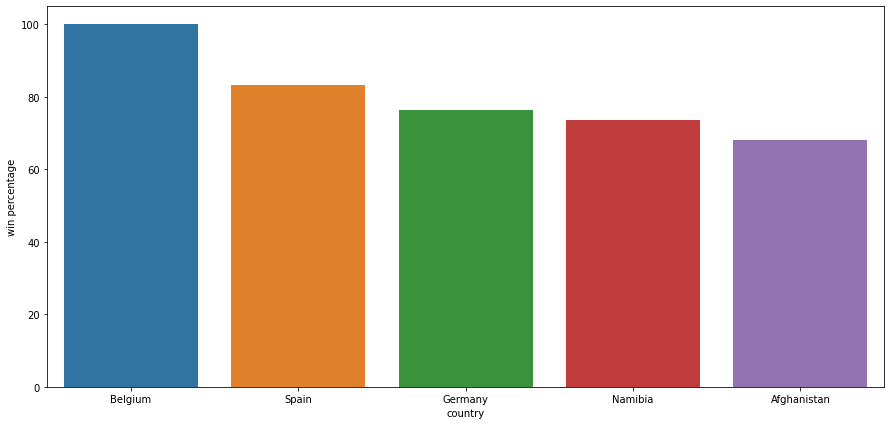

In [ ]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=wp_df.head(), x='country', y='win percentage', ax=ax)